In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [94]:
df = pd.read_csv('/Users/gengyunxin/Documents/项目/traffic_model/data/California/com_E_work_and_week_all.csv').values
df_T = df.transpose() # (24, 17568)

(24, 17568)

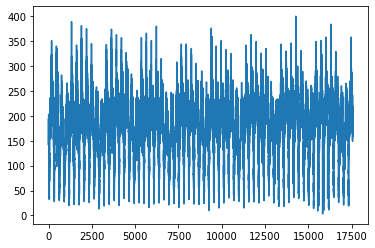

In [95]:
plt.plot(df_T[0])

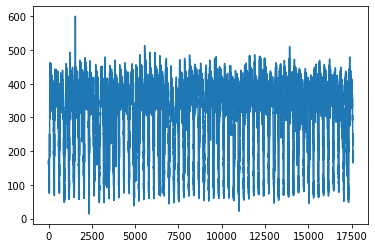

In [96]:
plt.plot(df_T[20])

In [80]:
def read_data(file_path, label, mode='pretrain'):
    
    if mode == 'pretrain':
        num_roads =20
        saved_path = '/Users/gengyunxin/Documents/项目/traffic_model/test/data/normalized_pretrain_data_72.csv'
        # 用20条路的数据做预训练，剩下4条做finetune
        df = pd.read_csv(file_path, names=None).iloc[:, 0:num_roads].values
    elif mode == 'finetune':
        num_roads = 4
        saved_path = '/Users/gengyunxin/Documents/项目/traffic_model/test/data/normalized_finetune_data_72.csv'
        df = pd.read_csv(file_path, names=None).iloc[:, -1 - num_roads:].values
    else:
        print("Choose mode from pretrain OR finetune!")
        
    df_T = df.transpose() # (20, 12384)
    # 每条样本的长度要综合考虑，不能存在两条道路的数据混合在一条样本中的情况
    # 即能被12384整除；
    # 还要和小时、天等实际意义挂钩；
    # 同时要考虑一条样本（sentence）中“词”的数量要合理
    
    # 每条路的数据独立做归一化
    raw = []
    for i in range(num_roads):
        array = df_T[i]
        max = array.max()
        min = array.min()
        normalized = ((array - min) / (max - min)).tolist()
        raw.append(normalized)

    df_norm = np.array(raw)
    
    data_quarter = df_norm.reshape(-1, 72) # 每条样本72个点,即1/4天 

    num_rows = data_quarter.shape[0]
    if label == 1:
        labels = np.ones((1, num_rows))
    else:
        labels = np.zeros((1, num_rows))
    data_with_label = np.insert(data_quarter, 72, values=labels, axis=1) 
    
    return data_with_label

In [81]:
workday_file = '/Users/gengyunxin/Documents/项目/traffic_model/data/California/combine_E_workday_n0.csv'
weekend_file = '/Users/gengyunxin/Documents/项目/traffic_model/data/California/combine_E_weekend_n0.csv'
# weekday->1 ; weekend->0
workday_with_label = read_data(workday_file, label=1) # (3400, 73)
weekend_with_label = read_data(weekend_file, label=0) # (1440, 73)

In [82]:
workday_with_label.shape

(3440, 73)

In [83]:
weekend_with_label.shape

(1440, 73)

In [84]:
all_with_label = np.append(workday_with_label, weekend_with_label, axis=0) # (4880, 73)

In [85]:
all_with_label.shape

(4880, 73)

In [86]:
df = pd.DataFrame(all_with_label)
df.to_csv('/Users/gengyunxin/Documents/项目/traffic_model/test/data/normalized_pretrain_data_72.csv', index=0, header=0)
df.shape

(4880, 73)

##### finetune

In [90]:
workday_ff = read_data(workday_file, label=1, mode='finetune')
weekend_ff = read_data(weekend_file, label=0, mode='finetune')
ff_with_label = np.append(workday_ff, weekend_ff, axis=0) # (976,73)
ff_with_label.shape

(976, 73)

In [91]:
df_ff = pd.DataFrame(ff_with_label)
df_ff.to_csv('/Users/gengyunxin/Documents/项目/traffic_model/test/data/normalized_finetune_data_72.csv', index=0, header=0)